In [39]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_score,recall_score
import matplotlib.pyplot as plt

In [82]:
dataset=pd.read_csv("data/diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [41]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
print(len(dataset))

768


In [43]:
dataset.shape

(768, 9)

In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [45]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [46]:
dataset.isnull().count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [47]:
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
for column in zero_not_accepted:
    dataset[column] = dataset[column].replace(0,np.nan) 
    mean = int(dataset[column].mean(skipna = True))
    dataset[column] = dataset[column].replace(np.nan, mean) 

In [48]:
print(dataset['Glucose'])

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64


In [49]:
print(dataset['BloodPressure'])

0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: BloodPressure, Length: 768, dtype: float64


In [50]:
x = dataset.iloc[:,0:8]
y = dataset.iloc[:,8]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=42)

In [51]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [52]:
len(y)

768

In [53]:
math.sqrt(len(y_test))

12.409673645990857

In [54]:
classifier = KNeighborsClassifier(n_neighbors = 11, p =2 ,metric = 'euclidean')

In [55]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [56]:
classifier.fit(x_test,y_test)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [57]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [58]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[88 11]
 [22 33]]


In [59]:
print(f1_score(y_test,y_pred))

0.6666666666666666


In [69]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.7857142857142857


In [70]:
print(precision_score(y_test,y_pred))

0.75


In [71]:
print(recall_score(y_test,y_pred))

0.6


Confusion Matrix shape: (2, 2)


Text(0.5, 0, 'Predicted label')

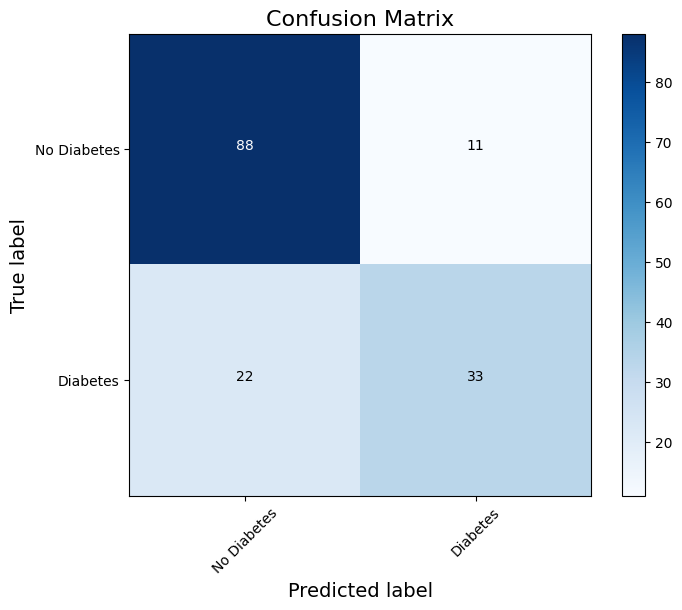

In [81]:
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix", fontsize=16)
plt.colorbar()
classes = ["No Diabetes", "Diabetes"]
tick_marks = [0, 1]
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2 
print("Confusion Matrix shape:", cm.shape)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        value = cm[i, j] 
        plt.text(j, i, f"{value}", 
                 horizontalalignment="center", 
                 color="white" if value > thresh else "black")

plt.ylabel("True label", fontsize=14)
plt.xlabel("Predicted label", fontsize=14)

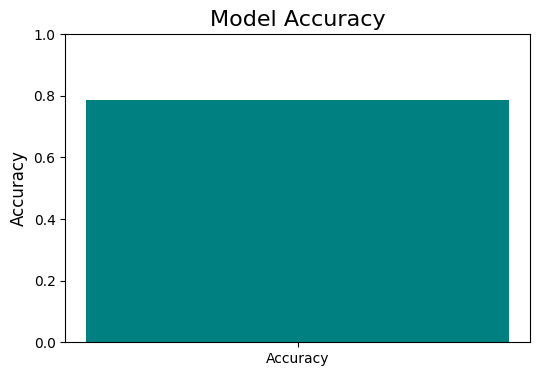

In [79]:
plt.figure(figsize=(6, 4))
plt.bar(["Accuracy"], [accuracy], color='teal')
plt.ylim(0, 1)
plt.title("Model Accuracy", fontsize=16)
plt.ylabel("Accuracy", fontsize=12)
plt.show()